<div style="background-color: rgb(230, 216, 173); padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; color: black; font-size: 20px; padding: 10px; text-align: right; position: absolute; right: 50px;">
        Neel Adalja <br>
        <span style="font-family: 'Arial', sans-serif;font-size: 12px; color: #0a0a0a;">Data Scientist</span>
    </div>
</div>

<div style="background-color: rgb(30, 69, 197); text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif; border-radius: 100px;">
    NLP - Amazon Customer Reviews Sentiment Analysis <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;"></h3>
</div


Dataset Source: https://jmcauley.ucsd.edu/data/amazon/, https://amazon-reviews-2023.github.io/

- Rating:               Float:  Rating of the product (from 1.0 to 5.0).

- Title:                str:    Title of the user review.

- Text:                 str:    Text body of the user review.

- Images:               list:   Images that users post after they have received the product. Each image has different sizes.             

- asin:                 str:    ID of the product.

- parent_asin:          str:    Parent ID of the product. Note: Products with different colors, styles, sizes usually belong to the same parent ID.

- user_id:              str:    ID of the reviewer

- timestamp:            int:    Time of the review (unix time)

- verified_purchase:    bool:   User purchase verification

- helpful_vote:         int:    Helpful votes of the review

In [67]:
# importing known libraries
import pandas as pd
import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

In [69]:
# Loaded the dataset from local folder.
df = pd.read_json("All_Beauty.jsonl", lines=True) 
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


In [71]:
# dropping the duplicates
df = df.drop_duplicates(subset=["rating", "title", "text"])

In [73]:
# Droped the missing values
df.dropna(subset=["rating", "text"], inplace=True)

In [75]:
# Keeping only relevant columns
df = df[["rating", "text"]]

In [131]:
df.head(20)

,rating,text,sentiment,cleaned_text,sentiment_label
0,5,This spray is really nice. It smells really go...,Positive,spray really nice smells really good goes real...,2
1,4,"This product does what I need it to do, I just...",Positive,product need wish odorless soft coconut smell ...,2
2,5,"Smells good, feels great!",Positive,smells good feels great,2
3,1,Felt synthetic,Negative,felt synthetic,0
4,5,Love it,Positive,love,2
5,4,The polish was quiet thick and did not apply s...,Positive,polish quiet thick apply smoothly let dry over...,2
6,5,Great for many tasks. I purchased these for m...,Positive,great many tasks purchased makeup removal make...,2
7,3,These were lightweight and soft but much too s...,Neutral,lightweight soft much small liking would prefe...,1
8,5,This is perfect for my between salon visits. I...,Positive,perfect salon visits using twice week month ab...,2
9,5,I get Keratin treatments at the salon at least...,Positive,get keratin treatments salon least 34 times ye...,2


In [77]:
# function to assign ratings categories. 
def label_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df["sentiment"] = df["rating"].apply(label_sentiment)

In [81]:
df.head()

,rating,text,sentiment
0,5,This spray is really nice. It smells really go...,Positive
1,4,"This product does what I need it to do, I just...",Positive
2,5,"Smells good, feels great!",Positive
3,1,Felt synthetic,Negative
4,5,Love it,Positive


In [79]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [83]:
nltk.data.path.append("C:/Users/neela/AppData/Roaming/nltk_data")  # Update with your actual path
nltk.download("punkt")

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neela\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neela\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
nltk.data.path.append("C:/Users/neela/AppData/Roaming/nltk_data") # data path was wrong earlier, had to reassign the path to make this lib work. 
nltk.download("punkt", force=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neela\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [87]:
# formatting the text and tokenization. 
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()  # Simple tokenization as fallback
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

df["cleaned_text"] = df["text"].apply(preprocess_text)


In [89]:
df.head()

,rating,text,sentiment,cleaned_text
0,5,This spray is really nice. It smells really go...,Positive,spray really nice smells really good goes real...
1,4,"This product does what I need it to do, I just...",Positive,product need wish odorless soft coconut smell ...
2,5,"Smells good, feels great!",Positive,smells good feels great
3,1,Felt synthetic,Negative,felt synthetic
4,5,Love it,Positive,love


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)

#applying it to the new column that was created. 
X = tfidf.fit_transform(df["cleaned_text"])

In [93]:
from sklearn.model_selection import train_test_split

# Convert labels to numbers
label_map = {"Negative": 0, "Neutral": 1, "Positive": 2}
df["sentiment_label"] = df["sentiment"].map(label_map)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df["sentiment_label"], test_size=0.2, random_state=42)


In [95]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


C:\Users\neela\jupenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8412664177661426
              precision    recall  f1-score   support

           0       0.75      0.75      0.75     28585
           1       0.43      0.11      0.17     11025
           2       0.88      0.95      0.91     94848

    accuracy                           0.84    134458
   macro avg       0.69      0.60      0.61    134458
weighted avg       0.81      0.84      0.82    134458



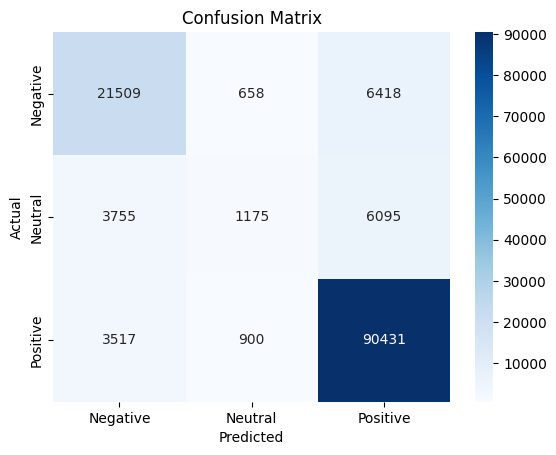

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ploting the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


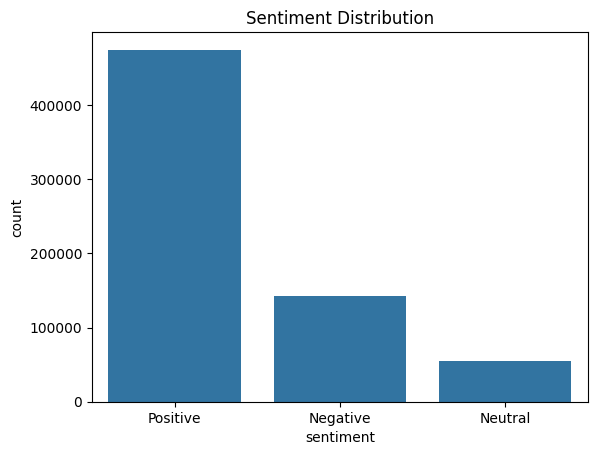

In [101]:
sns.countplot(x=df["sentiment"])
plt.title("Sentiment Distribution")
plt.show()


In [137]:
#prediction = model.predict(X_test)

#label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
#predicted_sentiment = label_map[prediction[0]]

#print(f"Prediction for test review: {predicted_sentiment}")

Prediction for test review: Positive


In [163]:
# Test sentences
test_sentences = [
    "I really enjoyed this item",
    "This product was amazing",
    "I am disappointed with this product"
]

In [165]:
for sentence in test_sentences:
    cleaned_text = preprocess_text(sentence)
    features = tfidf.transform([cleaned_text]) # vectorizing
    
    predicted_label = model.predict(features)

    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"} # mapping the labels to sentiments. 
    predicted_sentiment = label_map[predicted_label[0]]

    print(f"Sentence: '{sentence}' => Predicted Sentiment: {predicted_sentiment}")

Sentence: 'I really enjoyed this item' => Predicted Sentiment: Positive
Sentence: 'This product was amazing' => Predicted Sentiment: Positive
Sentence: 'I am disappointed with this product' => Predicted Sentiment: Negative
